In [5]:
import pandas as pd
import numpy as np
import scipy
import xarray as xr
import dask 
import glob

import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns
matplotlib.rcParams['font.family'] = 'sans-serif'

matplotlib.rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans',
                               'Lucida Grande', 'Verdana']

In [2]:
DATA_FOLDER = '~/Resilio\ Sync/FXBootcamp/*.csv'


In [6]:
paths = glob.glob('/Users/justinsimcock/Resilio Sync/FXBootcamp/Hourly/USDJPY.csv')

In [27]:
df = pd.read_csv(paths[0], header=None, names=['hour', 'open', 'high', 'low', 'close', 'volume'])

In [28]:
df.index = pd.to_datetime(df.index, format='%Y%m%d')

In [32]:
df = df.rename(columns={'index': 'date'})

In [81]:
def seasonality_transform(ts):
    '''
    Computes daily-log returns for a financial time series 
    as well as creating categorical time dimension columns 
    used for seasonality analysis
    
    Parameters
    ==========
    ts: pd.Dataframe
    
    Returns
    =======
    pd.Dataframe
    '''
    
    ts['month'] = ts.date.dt.month
    ts['week'] = ts.date.dt.week
    ts['year'] = ts.date.dt.year
    ts['day_of_year'] = ts.date.dt.dayofyear
    ts['weekday'] = ts.date.dt.dayofweek
    ts['days_till_month_end'] = ts.date.dt.days_in_month - ts.date.dt.day
    ts['log_ret'] = np.log(ts.close) - np.log(ts.close.shift(1))
    
    return ts

In [82]:
ts = seasonality_transform(df)

In [87]:
weekly_hourly_log_rets = ts.groupby(['weekday', 'hour'])['log_ret']
hourly_volatility_returns_doy = weekly_hourly_log_rets.std()
hourly_mean_returns_doy = weekly_hourly_log_rets.mean()

In [74]:
#plt.bar(hourly_mean_returns_doy.values, height=.05)

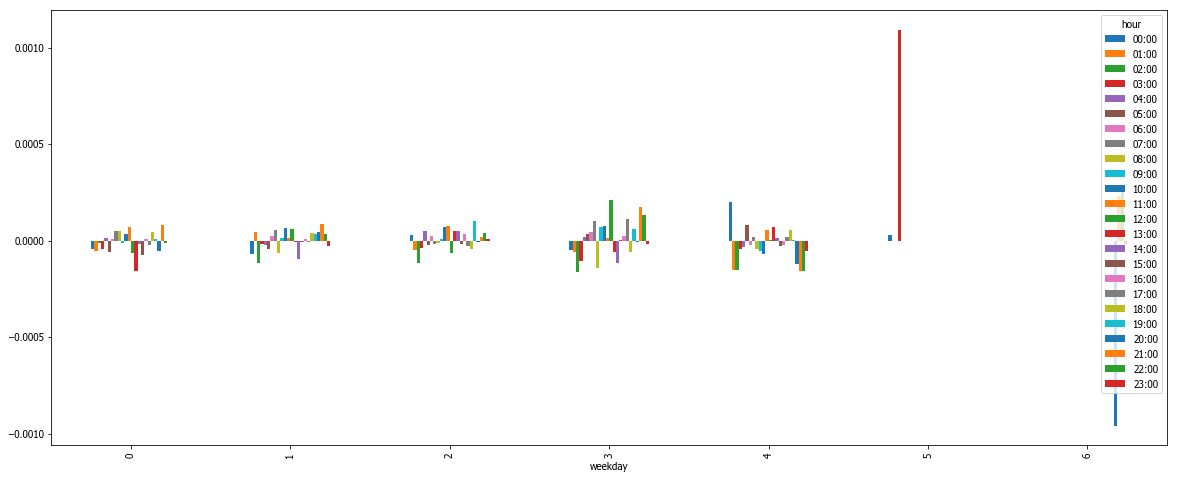

In [89]:
hourly_mean_returns_doy.unstack(level=1).plot(kind='bar', subplots=False, figsize=(20,8));

In [4]:
import numpy as np


-1